pip install lightgbm --config-settings=cmake.define.USE_GPU=ON --config-settings=cmake.define.OpenCL_INCLUDE_DIR="C:/Program Files/NVIDIA GPU Computing Toolkit/CUDA/v12.2/include" --config-settings=cmake.define.OpenCL_LIBRARY="C:/Program Files/NVIDIA GPU Computing Toolkit/CUDA/v12.2/lib/x64/OpenCL.lib" --config-settings=cmake.define.Boost_ROOT=C:/local/boost_1_78_0 --config-settings=cmake.define.BOOST_LIBRARYDIR=C:/local/boost_1_78_0/lib64-msvc-14.3

# Setup

In [1]:
%load_ext autoreload

In [23]:
%autoreload

import my_functions as mf
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 7)
pd.set_option('display.max_columns', 50)
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
plt.rcParams['figure.dpi'] = 200
plt.rcParams['savefig.dpi'] = 200
plt.rcParams['figure.figsize'] = (10, 5)
plt.style.use("seaborn-v0_8-darkgrid")
import seaborn as sns
sns.set(rc={"figure.dpi":200, 'savefig.dpi':200 , 'figure.figsize': (10, 5)})
sns.set_context('notebook')
sns.set_style("ticks")
sns.set_style('darkgrid')

from pycaret.regression import *

In [24]:
Y_train_a, X_train_a, X_test_a, X_a, train_a = mf.full_clean(pd.read_parquet('data/A/train_targets.parquet'),
                                                             pd.concat([pd.read_parquet('data/A/X_train_observed.parquet'), pd.read_parquet('data/A/X_train_estimated.parquet').drop("date_calc", axis=1)]),
                                                             pd.read_parquet('data/A/X_test_estimated.parquet').drop("date_calc", axis=1),
                                                             "A")

Y_train_b, X_train_b, X_test_b, X_b, train_b = mf.full_clean(pd.read_parquet('data/B/train_targets.parquet'),
                                                             pd.concat([pd.read_parquet('data/B/X_train_observed.parquet'), pd.read_parquet('data/B/X_train_estimated.parquet').drop("date_calc", axis=1)]),
                                                             pd.read_parquet('data/B/X_test_estimated.parquet').drop("date_calc", axis=1),
                                                             "B")

Y_train_c, X_train_c, X_test_c, X_c, train_c = mf.full_clean(pd.read_parquet('data/C/train_targets.parquet'),
                                                             pd.concat([pd.read_parquet('data/C/X_train_observed.parquet'), pd.read_parquet('data/C/X_train_estimated.parquet').drop("date_calc", axis=1)]),
                                                             pd.read_parquet('data/C/X_test_estimated.parquet').drop("date_calc", axis=1),
                                                             "C")

Y_train = pd.concat([Y_train_a, Y_train_b, Y_train_c], ignore_index=True)
X_train = pd.concat([X_train_a, X_train_b, X_train_c], ignore_index=True)
X_test = pd.concat([X_test_a, X_test_b, X_test_c], ignore_index=True)
X = pd.concat([X_a, X_b, X_c], ignore_index=True)
train = pd.concat([train_a, train_b, train_c], ignore_index=True)

# Main stuff:

In [4]:
# fig_train, axis_train = plt.subplots(len(train_a.columns), figsize=(10, 5 * len(train_a.columns)))

# for i in range(len(train_a.columns)):
#     if i > 0:
#         axis_train[i].title.set_text(f"{i-1}: {train_a.columns[i]}")
#     else:
#         axis_train[i].title.set_text(f"{train_a.columns[i]}")
#     axis_train[i].plot(train_a.iloc[:,[i]], label = "A")
#     axis_train[i].plot(train_b.iloc[:,[i]], label = "B")
#     axis_train[i].plot(train_c.iloc[:,[i]], label = "C")
#     axis_train[i].legend(loc="upper left")
#     axis_train[i].xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m'))

# plt.tight_layout()
# fig_train.savefig('fig/train.pdf', pad_inches = .5)
# plt.close(fig_train)

# fig_test, axis_test = plt.subplots(len(X_test_a.columns), figsize=(10, 5 * len(X_test_a.columns)))

# for i in range(len(X_test_a.columns)):
#     axis_test[i].title.set_text(f"{i}: {X_test_a.columns[i]}")
#     axis_test[i].plot(X_test_a.iloc[:,[i]], label = "A")
#     axis_test[i].plot(X_test_a.iloc[:,[i]], label = "B")
#     axis_test[i].plot(X_test_a.iloc[:,[i]], label = "C")
#     axis_test[i].legend(loc="upper left")
#     axis_test[i].xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m'))

# plt.tight_layout()
# fig_test.savefig('fig/test.pdf', pad_inches = .5)
# plt.close(fig_test)

In [5]:
# ignore_features = ["elevation__m",
#                        "snow_drift__idx",
#                        "sun_azimuth__d",
#                        "wind_speed_w_1000hPa__ms",
#                        "ceiling_height_agl__m",
#                        "cloud_base_agl__m",
#                        "snow_density__kgm3",
#                        "clear_sky_rad__W",
#                        "diffuse_rad__W",
#                        "direct_rad__W",
#                        "dew_point_2m__K",
#                        "pressure_100m__hPa",
#                        "sfc_pressure__hPa",
#                        "fresh_snow_12h__cm",
#                        "fresh_snow_24h__cm",
#                        "fresh_snow_3h__cm",
#                        "fresh_snow_6h__cm"]
    
# categorical_features = ["dew_or_rime__idx",
#                             "is_day__idx",
#                             "is_in_shadow__idx",
#                             "precip_type_5min__idx"]
    
# numeric_features = ["absolute_humidity_2m__gm3",
#                         "air_density_2m__kgm3",
#                         "clear_sky_energy_1h__J",
#                         # "clear_sky_rad__W",
#                         # "dew_point_2m__K",
#                         # "diffuse_rad__W",
#                         "diffuse_rad_1h__J",
#                         # "direct_rad__W",
#                         "direct_rad_1h__J",
#                         "effective_cloud_cover__p",
#                         # "fresh_snow_12h__cm",
#                         "fresh_snow_1h__cm",
#                         # "fresh_snow_24h__cm",
#                         # "fresh_snow_3h__cm",
#                         # "fresh_snow_6h__cm",
#                         "msl_pressure__hPa",
#                         "precip_5min__mm",
#                         # "pressure_100m__hPa",
#                         "pressure_50m__hPa",
#                         "prob_rime__p",
#                         "rain_water__kgm2",
#                         "relative_humidity_1000hPa__p",
#                         # "sfc_pressure__hPa",
#                         "snow_depth__cm",
#                         "snow_melt_10min__mm",
#                         "snow_water__kgm2",
#                         "sun_elevation__d",
#                         "super_cooled_liquid_water__kgm2",
#                         "t_1000hPa__K",
#                         "total_cloud_cover__p",
#                         "visibility__m",
#                         "wind_speed_10m__ms",
#                         "wind_speed_u_10m__ms",
#                         "wind_speed_v_10m__ms"]

In [41]:
reg = RegressionExperiment()
reg.setup(data = train,
          use_gpu = True,
          target = "pv_measurement",
          train_size = .95,
          create_date_columns = [],
        #   create_date_columns = ["day", "month"],
          fold = 2,
          session_id = 0)

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: Intel(R) UHD Graphics 620, Vendor: Intel(R) Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] Start training from score 0.500000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no m

,Description,Value
0,Session id,0
1,Target,pv_measurement
2,Target type,Regression
3,Original data shape,"(92951, 33)"
4,Transformed data shape,"(92951, 40)"
5,Transformed train set shape,"(88303, 40)"
6,Transformed test set shape,"(4648, 40)"
7,Ordinal features,2
8,Numeric features,26
9,Date features,1


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: Intel(R) UHD Graphics 620, Vendor: Intel(R) Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] Start training from score 0.500000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no m

In [11]:
# best = reg.compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,92.5028,67267.6444,259.3273,0.8857,1.6447,2.6191,40.0550
et,Extra Trees Regressor,86.7315,67417.8455,259.6370,0.8855,0.9319,1.4984,14.8100
lightgbm,Light Gradient Boosting Machine,91.6506,67952.3121,260.6177,0.8846,1.4259,2.6992,5.6950
xgboost,Extreme Gradient Boosting,94.9771,69592.3555,263.7705,0.8818,1.6252,2.7574,5.0250
rf,Random Forest Regressor,89.2341,69945.2916,264.4310,0.8812,0.9855,1.5516,35.6300
gbr,Gradient Boosting Regressor,109.2550,83052.5593,288.1649,0.8589,1.9612,4.0318,64.9500
ada,AdaBoost Regressor,159.0459,124405.4040,352.7098,0.7887,2.4594,7.0671,14.9600
dt,Decision Tree Regressor,120.1810,143022.8620,378.1826,0.7571,1.0539,1.4523,2.7500
ridge,Ridge Regression,313.6762,246907.0429,496.8891,0.5806,3.8541,40.5156,1.9200
lr,Linear Regression,313.7784,246910.2172,496.8922,0.5806,3.8540,40.6465,1.6450


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,91.5179,66628.6045,258.1252,0.8868,1.4294,2.9366
1,93.4708,71955.7215,268.2456,0.8778,1.4614,1.6638
Mean,92.4944,69292.1630,263.1854,0.8823,1.4454,2.3002
Std,0.9765,2663.5585,5.0602,0.0045,0.0160,0.6364


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,78.8380,44027.0536,209.8262,0.9227,1.4631,1.7057


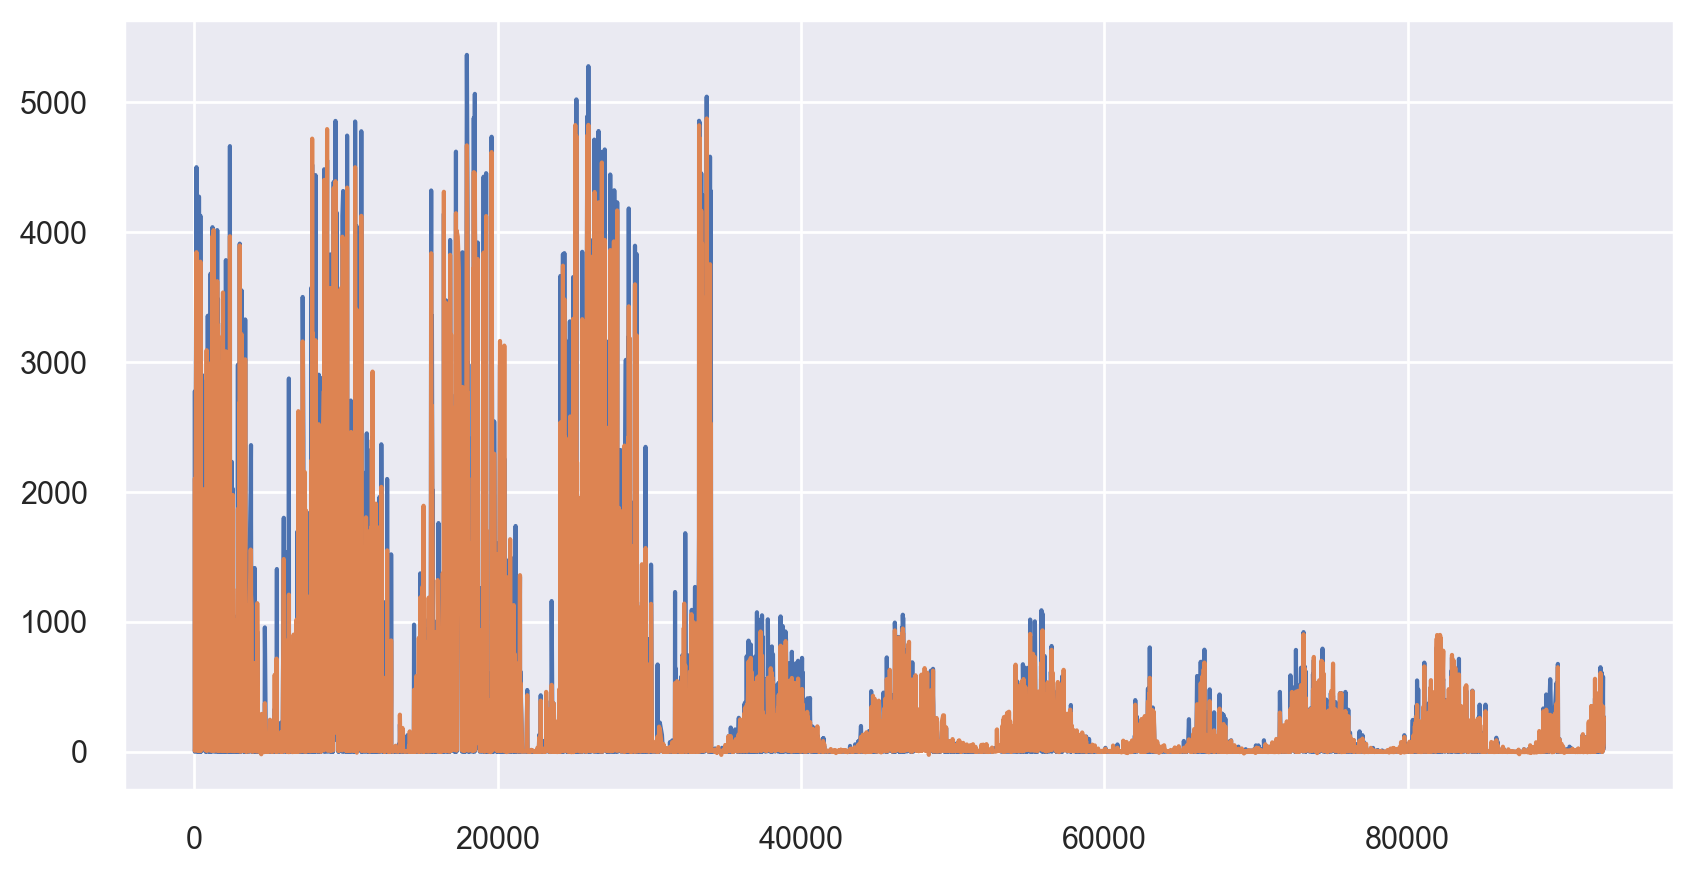

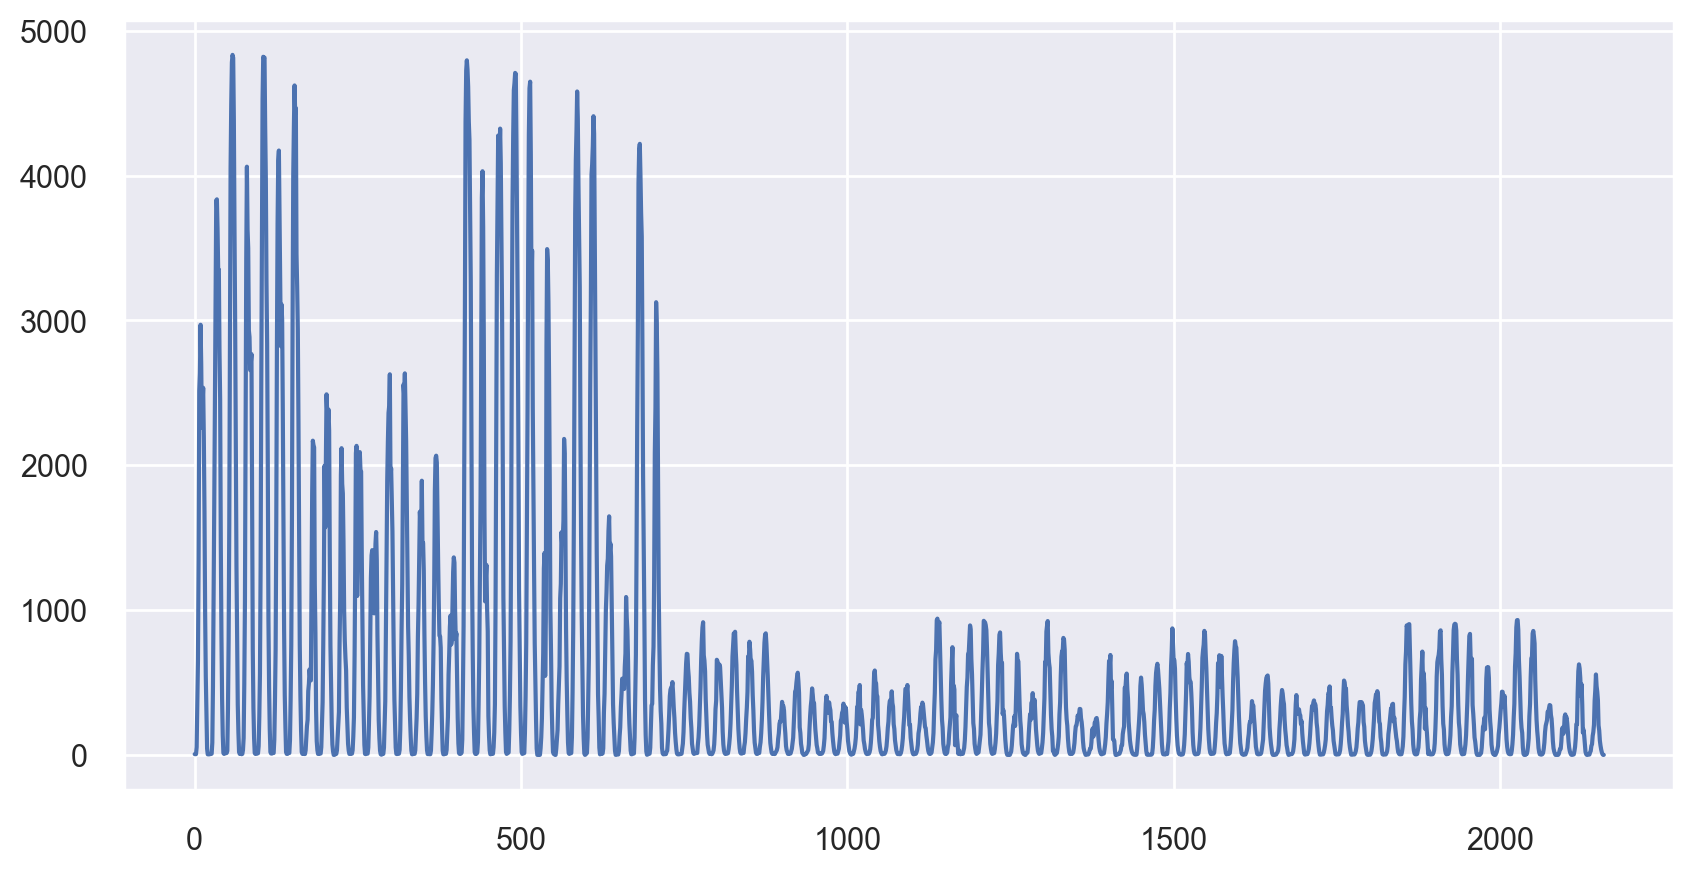

In [57]:
lgbm = reg.create_model("lightgbm")
lgbm_final = reg.finalize_model(lgbm)
# lgbm_tuned = reg.tune_model(lgbm)
# lgbm_final = reg.finalize_model(lgbm_tuned)


lgbm_predictions_holdout = reg.predict_model(lgbm_final)[["pv_measurement", "prediction_label"]].sort_index()
plt.plot(lgbm_predictions_holdout["pv_measurement"])
plt.plot(lgbm_predictions_holdout["prediction_label"])
plt.show()


lgbm_predictions = reg.predict_model(lgbm_final, data = X_test)["prediction_label"]
lgbm_predictions[lgbm_predictions < 0] = 0
plt.plot(lgbm_predictions)
plt.show()

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,93.3575,67810.2630,260.4040,0.8848,1.6441,3.5444
1,94.2080,71411.8617,267.2300,0.8787,1.5987,1.7741
Mean,93.7828,69611.0623,263.8170,0.8818,1.6214,2.6592
Std,0.4252,1800.7994,3.4130,0.0030,0.0227,0.8852


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,76.2825,38841.9403,197.0836,0.9318,1.6898,1.8701


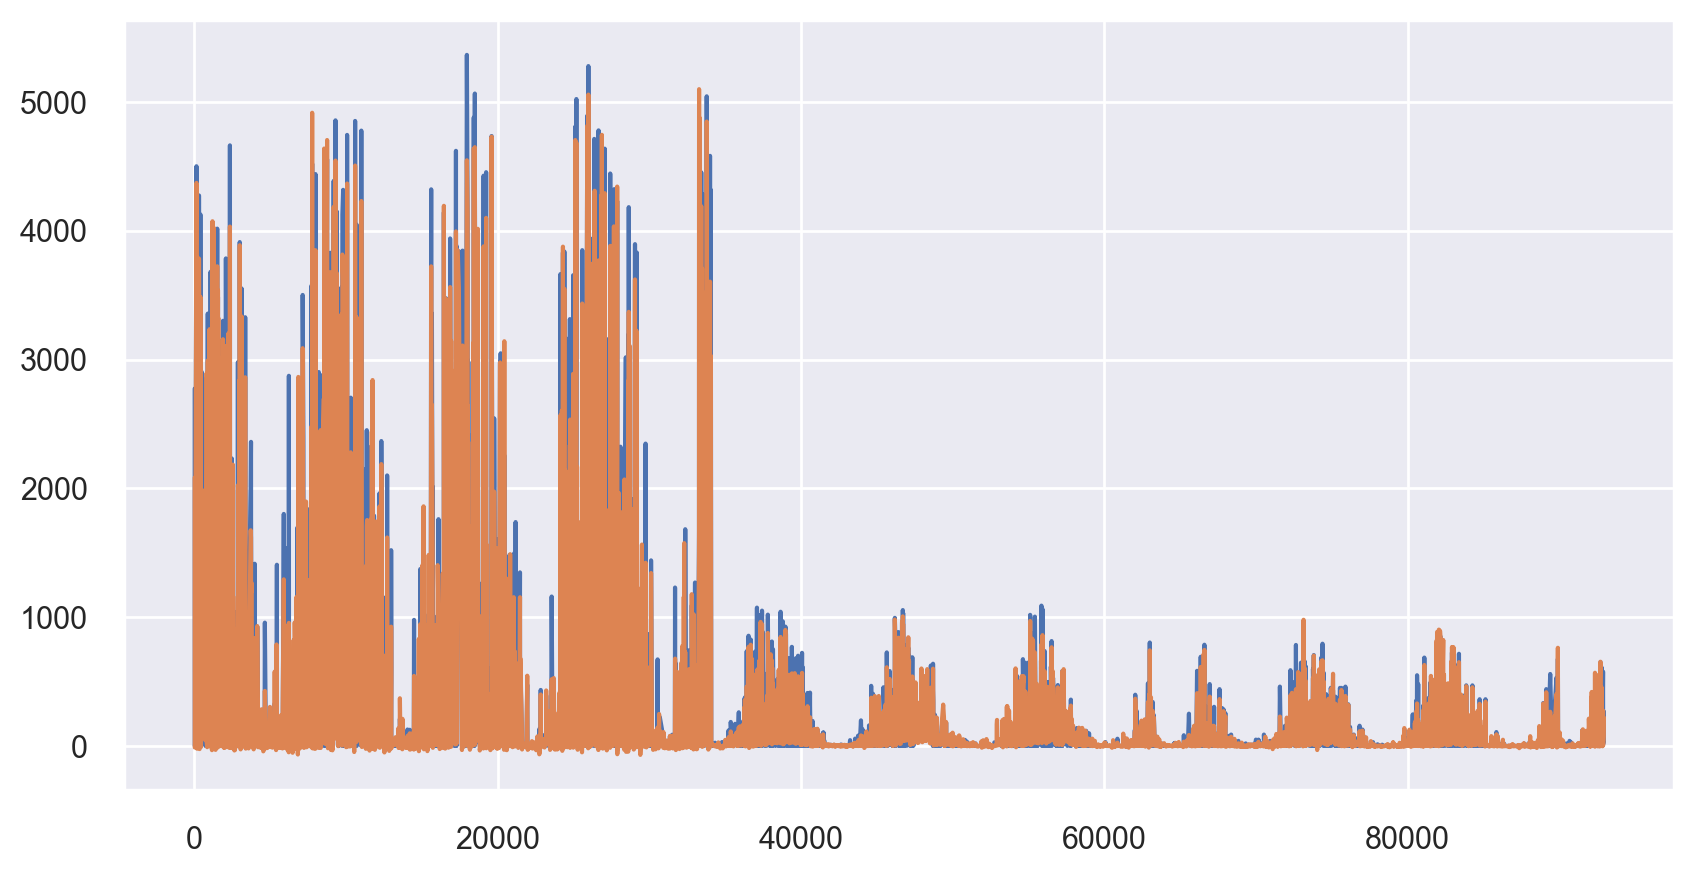

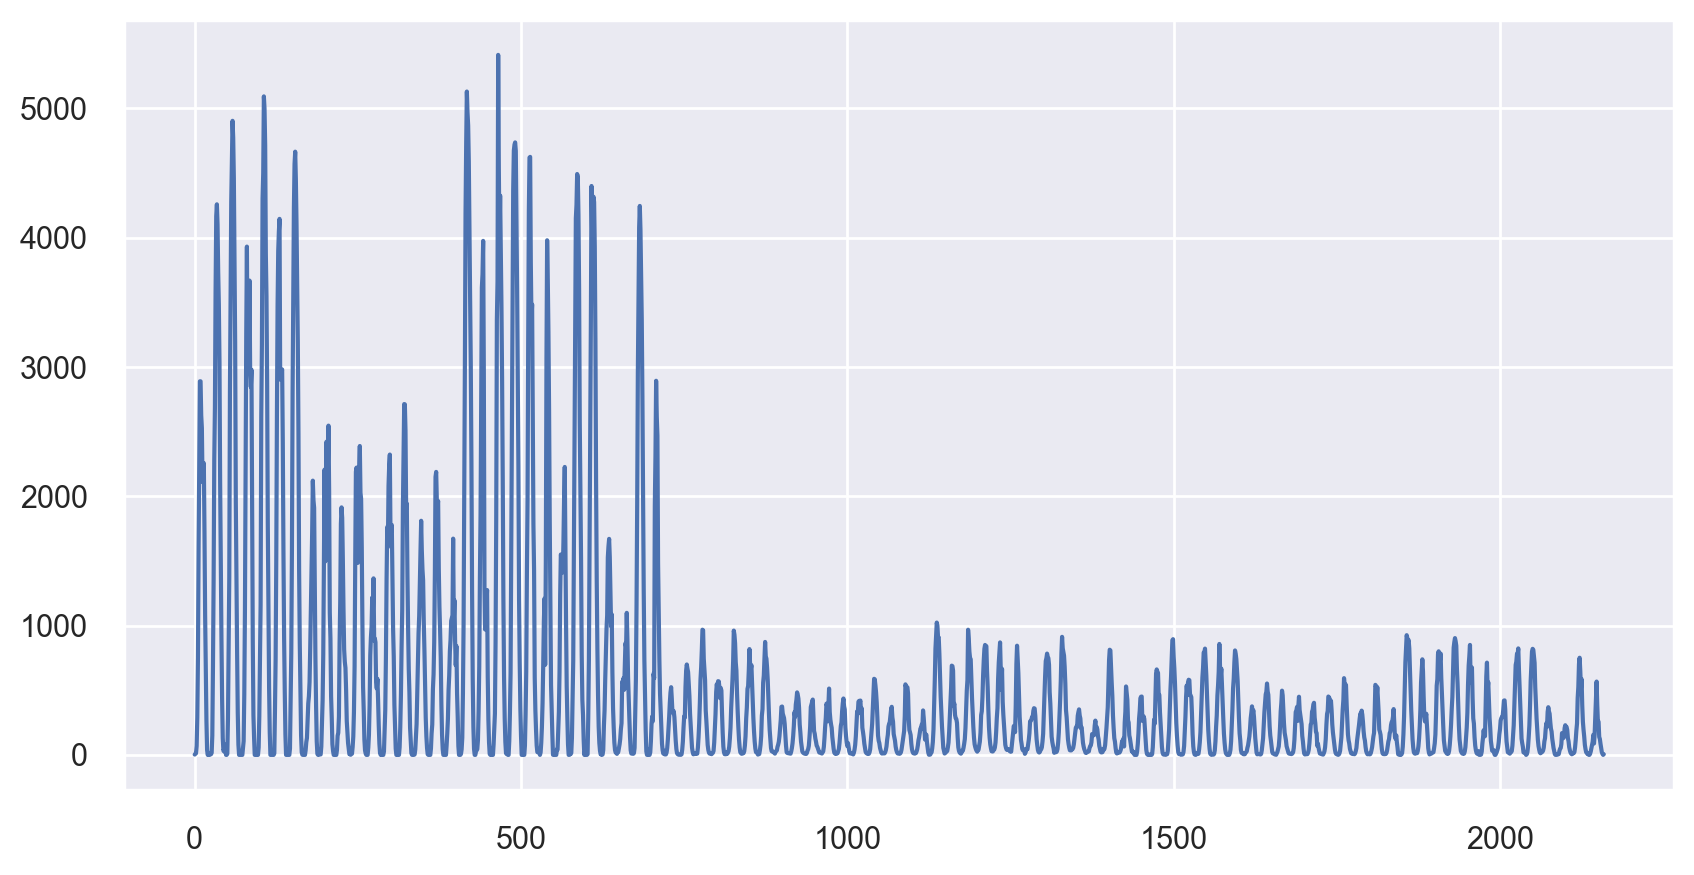

In [55]:
cat = reg.create_model("catboost")
cat_final = reg.finalize_model(cat)
# cat_tuned = reg.tune_model(cat)
# cat_final = reg.finalize_model(cat_tuned)


cat_predictions_holdout = reg.predict_model(cat_final)[["pv_measurement", "prediction_label"]].sort_index()
plt.plot(cat_predictions_holdout["pv_measurement"])
plt.plot(cat_predictions_holdout["prediction_label"])
plt.show()


cat_predictions = reg.predict_model(cat_final, data = X_test)["prediction_label"]
cat_predictions[cat_predictions < 0] = 0
plt.plot(cat_predictions)
plt.show()

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,87.9536,67658.1037,260.1117,0.8851,1.0017,4.3452
1,89.9390,70994.5116,266.4480,0.8794,1.0193,1.4584
Mean,88.9463,69326.3077,263.2798,0.8822,1.0105,2.9018
Std,0.9927,1668.2040,3.1681,0.0028,0.0088,1.4434


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000


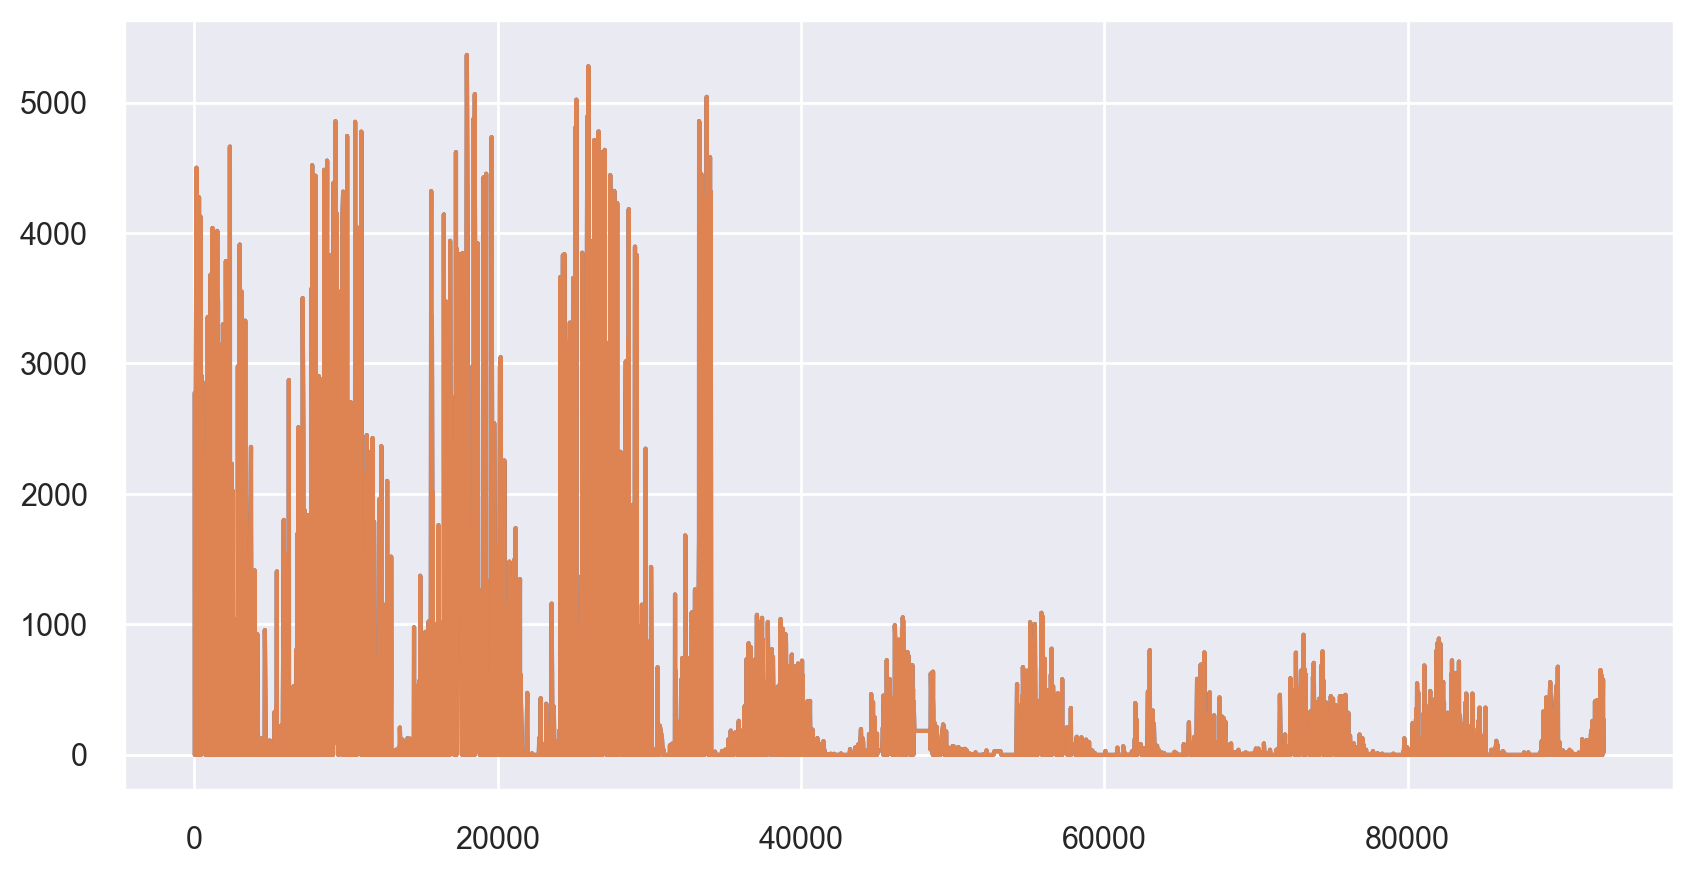

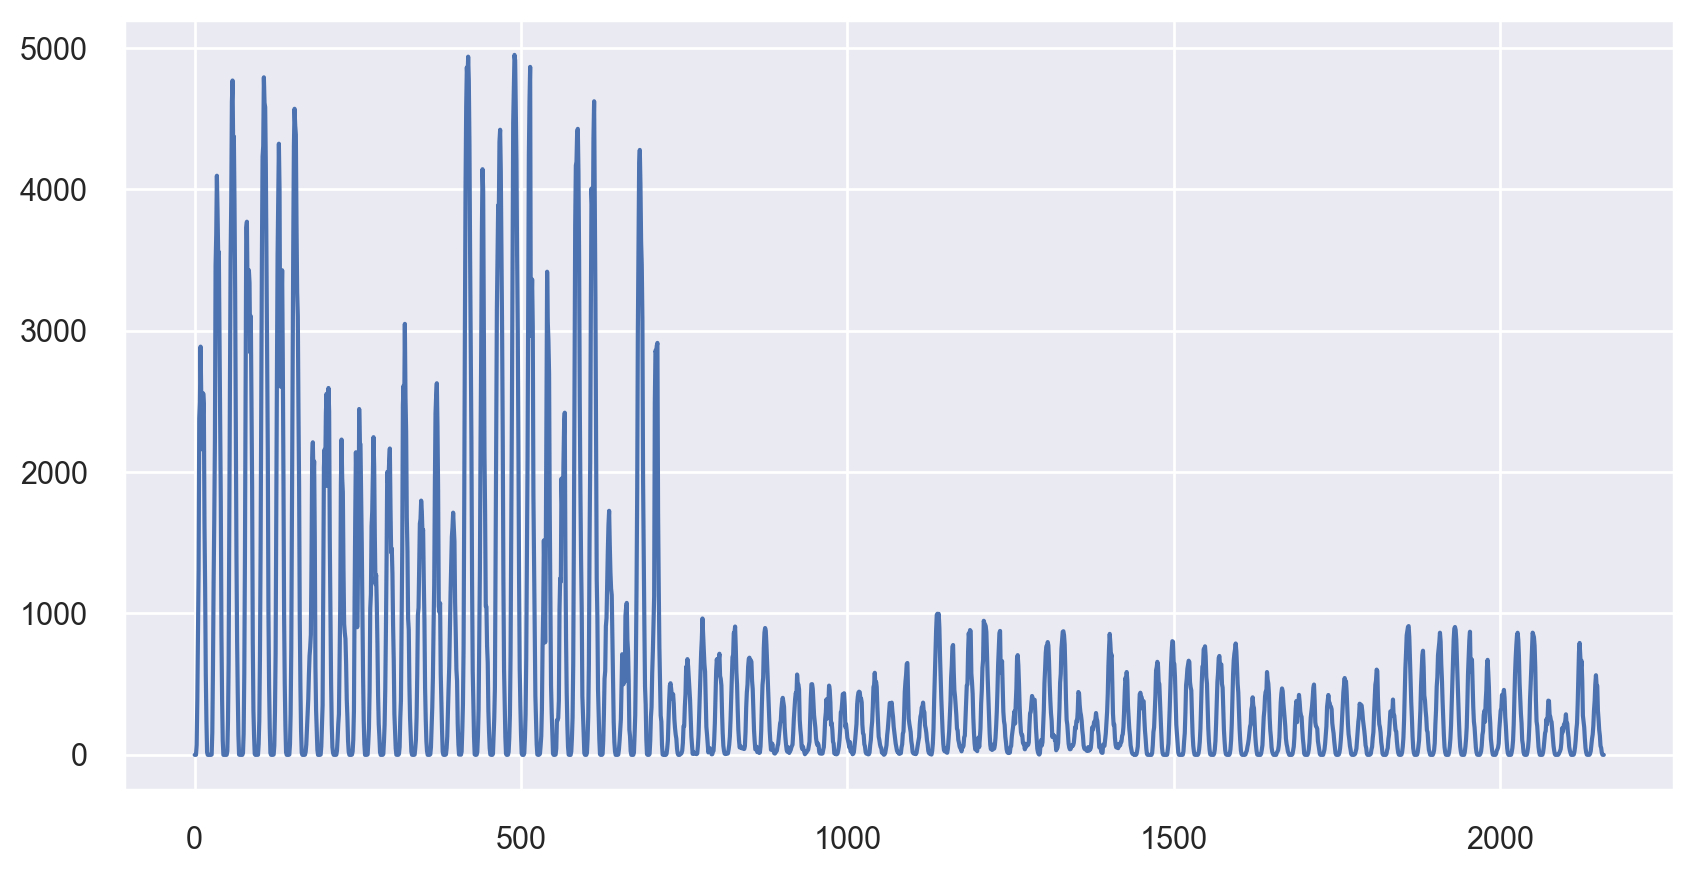

In [59]:
et = reg.create_model("et")
et_final = reg.finalize_model(et)
# et_tuned = reg.tune_model(et)
# et_final = reg.finalize_model(et_tuned)


et_predictions_holdout = reg.predict_model(et_final)[["pv_measurement", "prediction_label"]].sort_index()
plt.plot(et_predictions_holdout["pv_measurement"])
plt.plot(et_predictions_holdout["prediction_label"])
plt.show()


et_predictions = reg.predict_model(et_final, data = X_test)["prediction_label"]
et_predictions[et_predictions < 0] = 0
plt.plot(et_predictions)
plt.show()

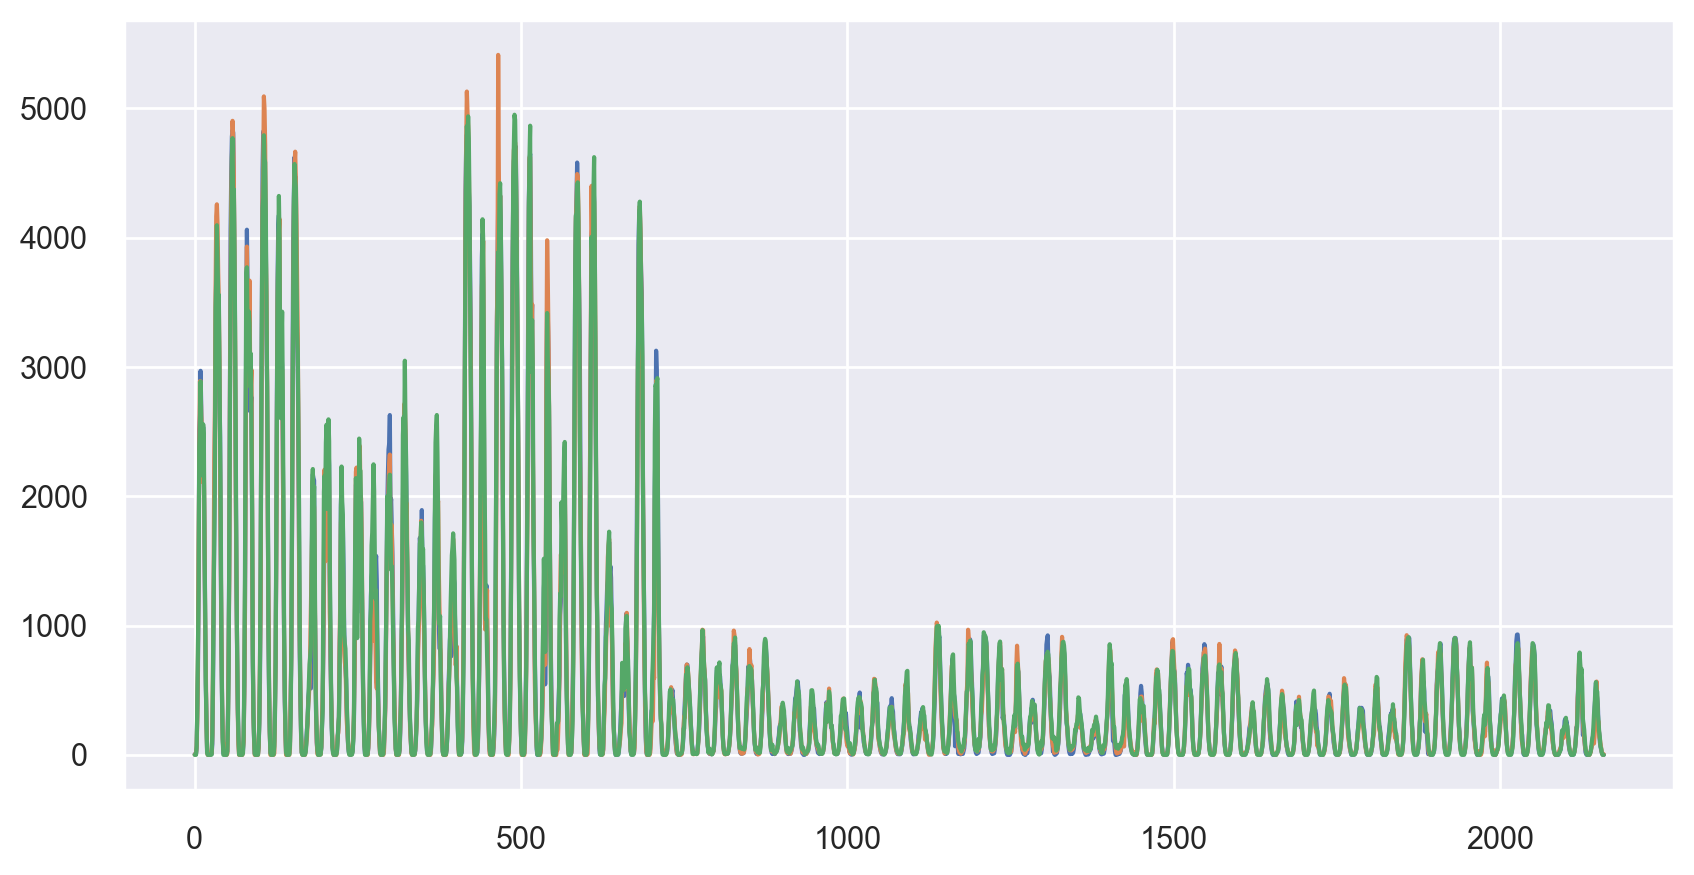

In [62]:
plt.plot(lgbm_predictions)
plt.plot(cat_predictions)
plt.plot(et_predictions)
plt.show()

In [ ]:
# mf.export_csv2(lgbm_predictions, "PyCaret_LightGBM_1")
# mf.export_csv2(cat_predictions, "PyCaret_CatBoost_1")
# mf.export_csv2(et_predictions, "PyCaret_Extra_Trees_1")

## A:

In [ ]:
reg_a = RegressionExperiment()
reg_a.setup(data = train_a.reset_index(),
            use_gpu = True,
            target = "pv_measurement",
            train_size = .99,
            create_date_columns = ["day", "month"],
            fold = 5,
            # polynomial_features = True,
            # polynomial_degree = 3,
            # feature_selection = True,
            # feature_selection_method = "sequential",
            # n_features_to_select = 5,
            # remove_multicollinearity = True,
            # fix_imbalance = True,
            session_id = 0)

In [ ]:
cat_a = reg_a.create_model("catboost")

In [ ]:
tuned_cat_a = reg_a.tune_model(cat_a, optimize = "MSE")

In [ ]:
ensembld_cat_a = reg_a.ensemble_model(cat_a, optimize = "MSE", choose_better = True)

In [ ]:
gbm_a = reg_a.create_model("lightgbm")

In [ ]:
ensembled_gbm_a = reg_a.ensemble_model(gbm_a, optimize = "MSE", choose_better = True)

In [ ]:
tuned_gbm_a = reg_a.tune_model(gbm_a, optimize = "MSE")

In [ ]:
final_gbm_a = reg_a.finalize_model(tuned_gbm_a)
predictions_gbm_a = reg_a.predict_model(final_gbm_a, data = X_test_a.reset_index()).iloc[:,-1:]
predictions_gbm_a[predictions_gbm_a < 0 ] = 0

In [ ]:
reg_a.compare_models()

## B:

In [ ]:
reg_b = RegressionExperiment()
reg_b.setup(data = train_b.reset_index(),
            # use_gpu = True,
            target = "pv_measurement",
            train_size = .99,
            create_date_columns = ["day", "month"],
            fold = 30,
            polynomial_features = True,
            # polynomial_degree = 3,
            # feature_selection = True,
            # feature_selection_method = "sequential",
            # n_features_to_select = 20,
            # remove_multicollinearity = True,
            # fix_imbalance = True,
            session_id = 0)

In [ ]:
gbm_b = reg_b.create_model("lightgbm")

In [ ]:
ensembled_gbm_b = reg_b.ensemble_model(gbm_b, optimize = "MSE", choose_better = True)

In [ ]:
tuned_gbm_b = reg_b.tune_model(gbm_b, optimize = "MSE")

In [ ]:
final_gbm_b = reg_b.finalize_model(tuned_gbm_b)
predictions_gbm_b = reg_b.predict_model(final_gbm_b, data = X_test_b.reset_index()).iloc[:,-1:]
predictions_gbm_b[predictions_gbm_b < 0 ] = 0

## C:

In [ ]:
reg_c = RegressionExperiment()
reg_c.setup(data = train_c.reset_index(),
            # use_gpu = True,
            target = "pv_measurement",
            train_size = .99,
            # create_date_columns = ["day", "month"],
            # fold = 30,
            # polynomial_features = True,
            # polynomial_degree = 3,
            # feature_selection = True,
            # feature_selection_method = "sequential",
            # n_features_to_select = 20,
            # remove_multicollinearity = True,
            # fix_imbalance = True,
            session_id = 0)

In [ ]:
gbm_c = reg_c.create_model("lightgbm")

In [ ]:
ensembled_gbm_c = reg_c.ensemble_model(gbm_c, optimize = "MSE", choose_better = True)

In [ ]:
tuned_gbm_c = reg_c.tune_model(gbm_c, optimize = "MSE")

In [ ]:
final_gbm_c = reg_c.finalize_model(tuned_gbm_c)
predictions_gbm_c = reg_c.predict_model(final_gbm_c, data = X_test_c.reset_index()).iloc[:,-1:]
predictions_gbm_c[predictions_gbm_c < 0 ] = 0

# Export

In [ ]:
# mf.export_csv(np.concatenate([predictions_cat_a, predictions_cat_b, predictions_cat_c]), "PyCaret_Tuned_CatBoost_5")
# mf.export_csv(np.concatenate([predictions_gbm_a, predictions_gbm_c, predictions_gbm_c]), "PyCaret_Tuned_LightGBM_2")
# mf.export_csv(np.concatenate([predictions_et_a, predictions_et_b, predictions_et_c]), "PyCaret_Extra_Trees")